# T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

## One-sample T-test with Python

The test will tell us whether means of the sample and the population are different
image.png

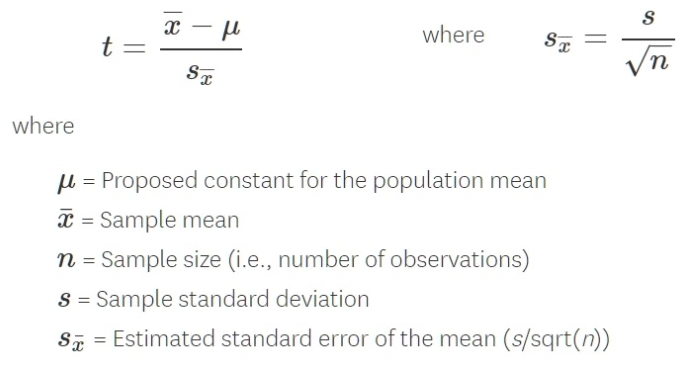

In [1]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [2]:
len(ages)

32

In [3]:
import numpy as np
mean_ages = np.mean(ages)
print(mean_ages)

30.34375


In [4]:
## Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [5]:
age_sample

array([18, 65, 21, 21, 28, 65, 10, 25, 18, 20])

In [7]:
from scipy.stats import ttest_1samp

In [8]:
ttest,p_value=ttest_1samp(age_sample,30)

In [9]:
p_value

0.8871544564355425

In [10]:
if p_value > 0.5:
    print("We are excepting null hypothesis")
else:
    print("We are rejecting null hypothesis")

We are excepting null hypothesis


## Some More Examples

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [13]:
classA_ages.mean()

46.9

In [14]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [15]:
p_value

1.139027071016194e-13

In [16]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

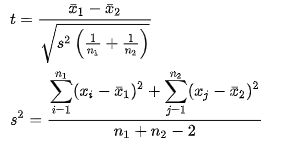

In [17]:
np.random.seed(12)
classB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
classB_ages.mean()

50.63333333333333

In [18]:
_,p_value=stats.ttest_ind(a=classA_ages,b=classB_ages,equal_var=False)

In [19]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [20]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [22]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [23]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [24]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [25]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [26]:
print(p_value)

0.5732936534411279


In [27]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")
     

we are accepting null hypothesis


## Correlation

In [28]:
import seaborn as sns
df=sns.load_dataset('iris')

In [29]:
df.shape

(150, 5)

In [30]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21968\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


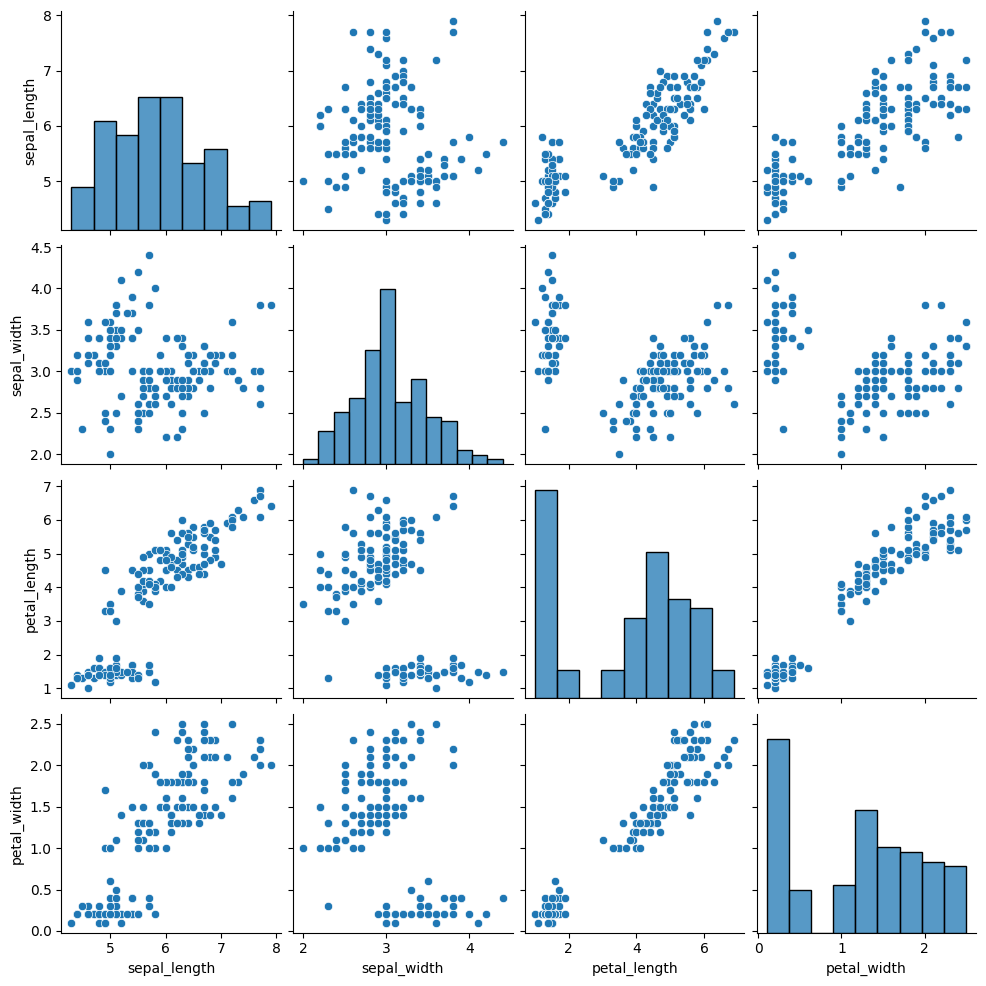

In [32]:
sns.pairplot(df)

## Chi-Square Test

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [33]:
import scipy.stats as stats
     

import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')
     

dataset.head()
     

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
#pd.crosstab will create a matrix type as shown in the output.
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [35]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [36]:
val=stats.chi2_contingency(dataset_table)

In [37]:
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [38]:
expected_vals= val[3]

In [40]:
no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


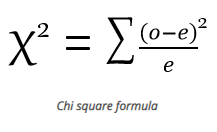

In [42]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,expected_vals)])
chi_square_statistic=chi_square[0]+chi_square[1]   
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [45]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#either upper critical_value technique or lower p_value technique   

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)
     


if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
#either upper critical_value technique or lower p_value technique   
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
     

critical_value: 3.841458820694124
p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
